## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  74.625150  1418.611332  0.082899  2.336257  1.285246
1  82.297118   631.577023  0.100158  5.249784  0.842468
2  51.289843   704.129888  0.277222  2.543471  1.378478
3  50.020284   969.532790  0.362932  6.478211  1.445058
4  34.906074   575.869765  0.149729  9.943623  1.028443


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.03721 | train_mse: 3.14715 | train_mae: 1.40336 |  0:00:00s
epoch 1  | loss: 0.87879 | train_mse: 2.1429  | train_mae: 1.18662 |  0:00:00s
epoch 2  | loss: 0.77499 | train_mse: 1.93166 | train_mae: 1.05946 |  0:00:00s


epoch 3  | loss: 0.64424 | train_mse: 2.69805 | train_mae: 1.25383 |  0:00:00s
epoch 4  | loss: 0.65052 | train_mse: 2.06317 | train_mae: 1.08557 |  0:00:00s


epoch 5  | loss: 0.52233 | train_mse: 1.23779 | train_mae: 0.80828 |  0:00:00s
epoch 6  | loss: 0.40985 | train_mse: 0.91272 | train_mae: 0.62549 |  0:00:00s


epoch 7  | loss: 0.33333 | train_mse: 1.13826 | train_mae: 0.66714 |  0:00:00s
epoch 8  | loss: 0.30263 | train_mse: 1.18132 | train_mae: 0.71441 |  0:00:01s


epoch 9  | loss: 0.25961 | train_mse: 1.53945 | train_mae: 0.89607 |  0:00:01s
epoch 10 | loss: 0.36275 | train_mse: 1.51703 | train_mae: 0.87247 |  0:00:01s
epoch 11 | loss: 0.51531 | train_mse: 0.61364 | train_mae: 0.59466 |  0:00:01s


epoch 12 | loss: 0.38195 | train_mse: 0.50348 | train_mae: 0.55005 |  0:00:01s
epoch 13 | loss: 0.39616 | train_mse: 0.45058 | train_mae: 0.50538 |  0:00:01s
epoch 14 | loss: 0.41833 | train_mse: 0.588   | train_mae: 0.56854 |  0:00:01s


epoch 15 | loss: 0.32932 | train_mse: 0.39434 | train_mae: 0.48695 |  0:00:01s
epoch 16 | loss: 0.24488 | train_mse: 0.35143 | train_mae: 0.45638 |  0:00:02s


epoch 17 | loss: 0.30433 | train_mse: 0.42409 | train_mae: 0.4815  |  0:00:02s
epoch 18 | loss: 0.2132  | train_mse: 0.72171 | train_mae: 0.5635  |  0:00:02s
epoch 19 | loss: 0.21219 | train_mse: 1.01827 | train_mae: 0.63435 |  0:00:02s


epoch 20 | loss: 0.24957 | train_mse: 1.41906 | train_mae: 0.72577 |  0:00:02s
epoch 21 | loss: 0.35042 | train_mse: 1.06807 | train_mae: 0.6422  |  0:00:02s
epoch 22 | loss: 0.2762  | train_mse: 0.52556 | train_mae: 0.49161 |  0:00:02s


epoch 23 | loss: 0.2645  | train_mse: 0.76464 | train_mae: 0.53247 |  0:00:02s
epoch 24 | loss: 0.32219 | train_mse: 1.34293 | train_mae: 0.65568 |  0:00:02s


epoch 25 | loss: 0.38716 | train_mse: 1.73076 | train_mae: 0.72864 |  0:00:02s
epoch 26 | loss: 0.33439 | train_mse: 1.06357 | train_mae: 0.59836 |  0:00:03s


epoch 27 | loss: 0.20238 | train_mse: 1.10721 | train_mae: 0.59789 |  0:00:03s
epoch 28 | loss: 0.23499 | train_mse: 1.61121 | train_mae: 0.68766 |  0:00:03s
epoch 29 | loss: 0.19035 | train_mse: 2.08641 | train_mae: 0.76285 |  0:00:03s


epoch 30 | loss: 0.22319 | train_mse: 2.9331  | train_mae: 0.87497 |  0:00:03s
epoch 31 | loss: 0.41967 | train_mse: 1.78277 | train_mae: 0.70172 |  0:00:03s
epoch 32 | loss: 0.12798 | train_mse: 1.18475 | train_mae: 0.59546 |  0:00:03s


epoch 33 | loss: 0.20662 | train_mse: 1.00743 | train_mae: 0.55206 |  0:00:03s
epoch 34 | loss: 0.25732 | train_mse: 0.94924 | train_mae: 0.55522 |  0:00:03s


epoch 35 | loss: 0.2084  | train_mse: 1.3367  | train_mae: 0.6344  |  0:00:03s
epoch 36 | loss: 0.11826 | train_mse: 1.38359 | train_mae: 0.64322 |  0:00:03s
epoch 37 | loss: 0.13737 | train_mse: 1.24912 | train_mae: 0.61959 |  0:00:04s


epoch 38 | loss: 0.18407 | train_mse: 1.31217 | train_mae: 0.63514 |  0:00:04s
epoch 39 | loss: 0.16525 | train_mse: 1.52096 | train_mae: 0.66812 |  0:00:04s
epoch 40 | loss: 0.12046 | train_mse: 1.43541 | train_mae: 0.65299 |  0:00:04s


epoch 41 | loss: 0.27334 | train_mse: 1.13803 | train_mae: 0.61245 |  0:00:04s
epoch 42 | loss: 0.25652 | train_mse: 0.72219 | train_mae: 0.50983 |  0:00:04s
epoch 43 | loss: 0.20045 | train_mse: 1.3798  | train_mae: 0.66179 |  0:00:04s


epoch 44 | loss: 0.27849 | train_mse: 1.84046 | train_mae: 0.7446  |  0:00:04s
epoch 45 | loss: 0.19595 | train_mse: 1.90194 | train_mae: 0.75625 |  0:00:04s


epoch 46 | loss: 0.20032 | train_mse: 1.27906 | train_mae: 0.61401 |  0:00:04s
epoch 47 | loss: 0.17488 | train_mse: 1.0968  | train_mae: 0.57661 |  0:00:05s


epoch 48 | loss: 0.20443 | train_mse: 1.23218 | train_mae: 0.58913 |  0:00:05s
epoch 49 | loss: 0.13371 | train_mse: 1.12374 | train_mae: 0.56564 |  0:00:05s
epoch 50 | loss: 0.32594 | train_mse: 1.01235 | train_mae: 0.53521 |  0:00:05s


epoch 51 | loss: 0.1718  | train_mse: 1.28401 | train_mae: 0.59061 |  0:00:05s
epoch 52 | loss: 0.23166 | train_mse: 1.17222 | train_mae: 0.56795 |  0:00:05s
epoch 53 | loss: 0.35325 | train_mse: 0.66937 | train_mae: 0.47636 |  0:00:05s


epoch 54 | loss: 0.22827 | train_mse: 0.33433 | train_mae: 0.36725 |  0:00:05s
epoch 55 | loss: 0.20707 | train_mse: 0.2409  | train_mae: 0.33319 |  0:00:05s


epoch 56 | loss: 0.20273 | train_mse: 0.31389 | train_mae: 0.37366 |  0:00:06s
epoch 57 | loss: 0.18138 | train_mse: 0.43837 | train_mae: 0.41747 |  0:00:06s


epoch 58 | loss: 0.27313 | train_mse: 0.6435  | train_mae: 0.45792 |  0:00:06s
epoch 59 | loss: 0.16843 | train_mse: 0.30665 | train_mae: 0.35485 |  0:00:06s
epoch 60 | loss: 0.20189 | train_mse: 0.10562 | train_mae: 0.24456 |  0:00:06s


epoch 61 | loss: 0.16977 | train_mse: 0.10484 | train_mae: 0.24347 |  0:00:06s
epoch 62 | loss: 0.2331  | train_mse: 0.12139 | train_mae: 0.261   |  0:00:06s
epoch 63 | loss: 0.18345 | train_mse: 0.16942 | train_mae: 0.27334 |  0:00:06s


epoch 64 | loss: 0.24076 | train_mse: 0.30513 | train_mae: 0.30747 |  0:00:06s
epoch 65 | loss: 0.12552 | train_mse: 0.15068 | train_mae: 0.26716 |  0:00:06s
epoch 66 | loss: 0.16041 | train_mse: 0.17219 | train_mae: 0.26542 |  0:00:07s


epoch 67 | loss: 0.10923 | train_mse: 0.27791 | train_mae: 0.30838 |  0:00:07s
epoch 68 | loss: 0.13737 | train_mse: 0.31385 | train_mae: 0.30232 |  0:00:07s
epoch 69 | loss: 0.22956 | train_mse: 0.39103 | train_mae: 0.33323 |  0:00:07s


epoch 70 | loss: 0.25061 | train_mse: 0.3678  | train_mae: 0.33032 |  0:00:07s
epoch 71 | loss: 0.31855 | train_mse: 0.33934 | train_mae: 0.30099 |  0:00:07s
epoch 72 | loss: 0.22425 | train_mse: 0.2772  | train_mae: 0.28039 |  0:00:07s


epoch 73 | loss: 0.23057 | train_mse: 0.17611 | train_mae: 0.26798 |  0:00:07s
epoch 74 | loss: 0.15494 | train_mse: 0.14393 | train_mae: 0.25008 |  0:00:07s


epoch 75 | loss: 0.16141 | train_mse: 0.22603 | train_mae: 0.28957 |  0:00:07s
epoch 76 | loss: 0.12917 | train_mse: 0.36721 | train_mae: 0.3367  |  0:00:08s
epoch 77 | loss: 0.18805 | train_mse: 0.39562 | train_mae: 0.3521  |  0:00:08s


epoch 78 | loss: 0.11077 | train_mse: 0.40752 | train_mae: 0.37891 |  0:00:08s
epoch 79 | loss: 0.15362 | train_mse: 0.41966 | train_mae: 0.38226 |  0:00:08s
epoch 80 | loss: 0.11223 | train_mse: 0.46047 | train_mae: 0.38544 |  0:00:08s


epoch 81 | loss: 0.07134 | train_mse: 0.44047 | train_mae: 0.36885 |  0:00:08s
epoch 82 | loss: 0.17101 | train_mse: 0.4001  | train_mae: 0.35555 |  0:00:08s
epoch 83 | loss: 0.16305 | train_mse: 0.23003 | train_mae: 0.31251 |  0:00:08s


epoch 84 | loss: 0.14437 | train_mse: 0.16186 | train_mae: 0.28478 |  0:00:08s
epoch 85 | loss: 0.11715 | train_mse: 0.16495 | train_mae: 0.29418 |  0:00:08s


epoch 86 | loss: 0.21342 | train_mse: 0.16183 | train_mae: 0.27594 |  0:00:08s
epoch 87 | loss: 0.21908 | train_mse: 0.16481 | train_mae: 0.2691  |  0:00:09s
epoch 88 | loss: 0.18415 | train_mse: 0.19923 | train_mae: 0.28591 |  0:00:09s


epoch 89 | loss: 0.24197 | train_mse: 0.21348 | train_mae: 0.28443 |  0:00:09s
epoch 90 | loss: 0.23965 | train_mse: 0.24305 | train_mae: 0.3008  |  0:00:09s
epoch 91 | loss: 0.14402 | train_mse: 0.27807 | train_mae: 0.32291 |  0:00:09s


epoch 92 | loss: 0.13074 | train_mse: 0.35733 | train_mae: 0.37164 |  0:00:09s
epoch 93 | loss: 0.19207 | train_mse: 0.50743 | train_mae: 0.43369 |  0:00:09s
epoch 94 | loss: 0.23407 | train_mse: 0.48862 | train_mae: 0.40302 |  0:00:09s


epoch 95 | loss: 0.3148  | train_mse: 0.40899 | train_mae: 0.35516 |  0:00:09s
epoch 96 | loss: 0.33526 | train_mse: 0.33743 | train_mae: 0.34872 |  0:00:09s
epoch 97 | loss: 0.27597 | train_mse: 0.25803 | train_mae: 0.34889 |  0:00:09s


epoch 98 | loss: 0.21866 | train_mse: 0.13954 | train_mae: 0.27241 |  0:00:09s
epoch 99 | loss: 0.16731 | train_mse: 0.11776 | train_mae: 0.23731 |  0:00:10s


epoch 100| loss: 0.21711 | train_mse: 0.19531 | train_mae: 0.27807 |  0:00:10s
epoch 101| loss: 0.22415 | train_mse: 0.24749 | train_mae: 0.30455 |  0:00:10s
epoch 102| loss: 0.24252 | train_mse: 0.20762 | train_mae: 0.29123 |  0:00:10s


epoch 103| loss: 0.18353 | train_mse: 0.13135 | train_mae: 0.2597  |  0:00:10s
epoch 104| loss: 0.23713 | train_mse: 0.11279 | train_mae: 0.24719 |  0:00:10s
epoch 105| loss: 0.23312 | train_mse: 0.08447 | train_mae: 0.22049 |  0:00:10s


epoch 106| loss: 0.21983 | train_mse: 0.08062 | train_mae: 0.21441 |  0:00:10s
epoch 107| loss: 0.24473 | train_mse: 0.1021  | train_mae: 0.22702 |  0:00:10s
epoch 108| loss: 0.14086 | train_mse: 0.13632 | train_mae: 0.2559  |  0:00:10s


epoch 109| loss: 0.25097 | train_mse: 0.12392 | train_mae: 0.25575 |  0:00:11s
epoch 110| loss: 0.14978 | train_mse: 0.09263 | train_mae: 0.22542 |  0:00:11s
epoch 111| loss: 0.12537 | train_mse: 0.12539 | train_mae: 0.24407 |  0:00:11s


epoch 112| loss: 0.17858 | train_mse: 0.15905 | train_mae: 0.25417 |  0:00:11s
epoch 113| loss: 0.13657 | train_mse: 0.09993 | train_mae: 0.22584 |  0:00:11s
epoch 114| loss: 0.12646 | train_mse: 0.06681 | train_mae: 0.19563 |  0:00:11s


epoch 115| loss: 0.18611 | train_mse: 0.18393 | train_mae: 0.26458 |  0:00:11s
epoch 116| loss: 0.09494 | train_mse: 0.28083 | train_mae: 0.2834  |  0:00:11s
epoch 117| loss: 0.16054 | train_mse: 0.27422 | train_mae: 0.27637 |  0:00:11s


epoch 118| loss: 0.14867 | train_mse: 0.25666 | train_mae: 0.27507 |  0:00:11s
epoch 119| loss: 0.11547 | train_mse: 0.21763 | train_mae: 0.27515 |  0:00:11s
epoch 120| loss: 0.1101  | train_mse: 0.16917 | train_mae: 0.2481  |  0:00:11s


epoch 121| loss: 0.2493  | train_mse: 0.2065  | train_mae: 0.27159 |  0:00:12s
epoch 122| loss: 0.2711  | train_mse: 0.22205 | train_mae: 0.27836 |  0:00:12s
epoch 123| loss: 0.20892 | train_mse: 0.1668  | train_mae: 0.24325 |  0:00:12s


epoch 124| loss: 0.17354 | train_mse: 0.10784 | train_mae: 0.21899 |  0:00:12s
epoch 125| loss: 0.32319 | train_mse: 0.09073 | train_mae: 0.21862 |  0:00:12s
epoch 126| loss: 0.17945 | train_mse: 0.08528 | train_mae: 0.22006 |  0:00:12s


epoch 127| loss: 0.14645 | train_mse: 0.07699 | train_mae: 0.19964 |  0:00:12s
epoch 128| loss: 0.15602 | train_mse: 0.10921 | train_mae: 0.2239  |  0:00:12s
epoch 129| loss: 0.14081 | train_mse: 0.14357 | train_mae: 0.23454 |  0:00:12s


epoch 130| loss: 0.32027 | train_mse: 0.17794 | train_mae: 0.25636 |  0:00:12s
epoch 131| loss: 0.24681 | train_mse: 0.11451 | train_mae: 0.23669 |  0:00:13s
epoch 132| loss: 0.19462 | train_mse: 0.07266 | train_mae: 0.215   |  0:00:13s


epoch 133| loss: 0.09473 | train_mse: 0.07167 | train_mae: 0.20882 |  0:00:13s
epoch 134| loss: 0.24765 | train_mse: 0.08232 | train_mae: 0.21456 |  0:00:13s
epoch 135| loss: 0.09359 | train_mse: 0.07918 | train_mae: 0.20441 |  0:00:13s


epoch 136| loss: 0.09407 | train_mse: 0.07111 | train_mae: 0.19649 |  0:00:13s
epoch 137| loss: 0.1232  | train_mse: 0.06102 | train_mae: 0.18492 |  0:00:13s
epoch 138| loss: 0.174   | train_mse: 0.08069 | train_mae: 0.19821 |  0:00:13s


epoch 139| loss: 0.08784 | train_mse: 0.16916 | train_mae: 0.24257 |  0:00:13s
epoch 140| loss: 0.10262 | train_mse: 0.26709 | train_mae: 0.31034 |  0:00:13s


epoch 141| loss: 0.1508  | train_mse: 0.33884 | train_mae: 0.36325 |  0:00:14s
epoch 142| loss: 0.1791  | train_mse: 0.28661 | train_mae: 0.33052 |  0:00:14s
epoch 143| loss: 0.13931 | train_mse: 0.21554 | train_mae: 0.28895 |  0:00:14s


epoch 144| loss: 0.13441 | train_mse: 0.1648  | train_mae: 0.27023 |  0:00:14s
epoch 145| loss: 0.10833 | train_mse: 0.13077 | train_mae: 0.25261 |  0:00:14s
epoch 146| loss: 0.1054  | train_mse: 0.11666 | train_mae: 0.24932 |  0:00:14s


epoch 147| loss: 0.15976 | train_mse: 0.10945 | train_mae: 0.2533  |  0:00:14s
epoch 148| loss: 0.12027 | train_mse: 0.07095 | train_mae: 0.19926 |  0:00:14s
epoch 149| loss: 0.19758 | train_mse: 0.06543 | train_mae: 0.19302 |  0:00:14s


epoch 150| loss: 0.12621 | train_mse: 0.06202 | train_mae: 0.19096 |  0:00:14s
epoch 151| loss: 0.1158  | train_mse: 0.08563 | train_mae: 0.21279 |  0:00:15s
epoch 152| loss: 0.10047 | train_mse: 0.14158 | train_mae: 0.23563 |  0:00:15s


epoch 153| loss: 0.10617 | train_mse: 0.13182 | train_mae: 0.23315 |  0:00:15s
epoch 154| loss: 0.11919 | train_mse: 0.08474 | train_mae: 0.21543 |  0:00:15s


epoch 155| loss: 0.08653 | train_mse: 0.07356 | train_mae: 0.21074 |  0:00:15s
epoch 156| loss: 0.31138 | train_mse: 0.07544 | train_mae: 0.21457 |  0:00:15s
epoch 157| loss: 0.17172 | train_mse: 0.08402 | train_mae: 0.20119 |  0:00:15s


epoch 158| loss: 0.12067 | train_mse: 0.09184 | train_mae: 0.22097 |  0:00:15s
epoch 159| loss: 0.14851 | train_mse: 0.08356 | train_mae: 0.2113  |  0:00:15s
epoch 160| loss: 0.269   | train_mse: 0.07189 | train_mae: 0.18942 |  0:00:15s


epoch 161| loss: 0.16304 | train_mse: 0.09015 | train_mae: 0.2137  |  0:00:16s
epoch 162| loss: 0.11878 | train_mse: 0.10225 | train_mae: 0.22259 |  0:00:16s
epoch 163| loss: 0.11041 | train_mse: 0.1042  | train_mae: 0.22484 |  0:00:16s


epoch 164| loss: 0.16617 | train_mse: 0.14523 | train_mae: 0.25641 |  0:00:16s
epoch 165| loss: 0.08713 | train_mse: 0.20986 | train_mae: 0.29621 |  0:00:16s
epoch 166| loss: 0.12903 | train_mse: 0.26935 | train_mae: 0.32996 |  0:00:16s


epoch 167| loss: 0.08639 | train_mse: 0.21757 | train_mae: 0.2895  |  0:00:16s
epoch 168| loss: 0.17385 | train_mse: 0.16551 | train_mae: 0.25049 |  0:00:16s
epoch 169| loss: 0.29628 | train_mse: 0.12734 | train_mae: 0.23618 |  0:00:16s


epoch 170| loss: 0.13772 | train_mse: 0.09866 | train_mae: 0.23692 |  0:00:16s
epoch 171| loss: 0.2811  | train_mse: 0.08544 | train_mae: 0.2313  |  0:00:16s


epoch 172| loss: 0.16035 | train_mse: 0.06988 | train_mae: 0.20622 |  0:00:17s
epoch 173| loss: 0.10799 | train_mse: 0.07498 | train_mae: 0.21453 |  0:00:17s


epoch 174| loss: 0.14109 | train_mse: 0.07482 | train_mae: 0.20964 |  0:00:17s
epoch 175| loss: 0.10549 | train_mse: 0.07523 | train_mae: 0.2078  |  0:00:17s
epoch 176| loss: 0.11868 | train_mse: 0.09959 | train_mae: 0.21487 |  0:00:17s


epoch 177| loss: 0.16743 | train_mse: 0.15236 | train_mae: 0.24255 |  0:00:17s
epoch 178| loss: 0.20579 | train_mse: 0.17069 | train_mae: 0.24601 |  0:00:17s
epoch 179| loss: 0.15037 | train_mse: 0.23455 | train_mae: 0.26667 |  0:00:17s


epoch 180| loss: 0.11503 | train_mse: 0.28063 | train_mae: 0.30322 |  0:00:17s
epoch 181| loss: 0.2792  | train_mse: 0.29312 | train_mae: 0.31374 |  0:00:17s


epoch 182| loss: 0.16377 | train_mse: 0.31147 | train_mae: 0.31759 |  0:00:18s
epoch 183| loss: 0.13767 | train_mse: 0.34188 | train_mae: 0.33474 |  0:00:18s


epoch 184| loss: 0.2049  | train_mse: 0.34366 | train_mae: 0.32558 |  0:00:18s
epoch 185| loss: 0.14087 | train_mse: 0.31934 | train_mae: 0.30672 |  0:00:18s
epoch 186| loss: 0.12205 | train_mse: 0.3153  | train_mae: 0.29636 |  0:00:18s


epoch 187| loss: 0.19317 | train_mse: 0.338   | train_mae: 0.29844 |  0:00:18s

Early stopping occurred at epoch 187 with best_epoch = 137 and best_train_mae = 0.18492
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

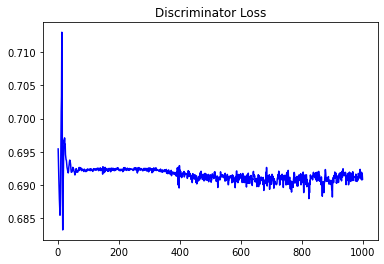

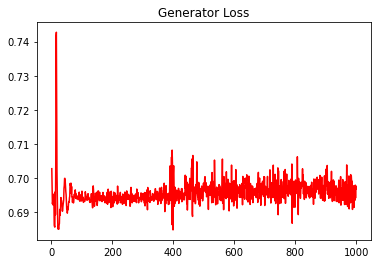

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.399747680577808


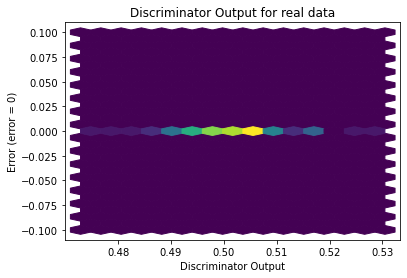

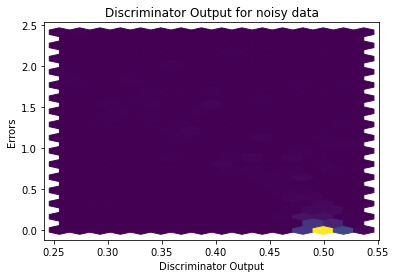

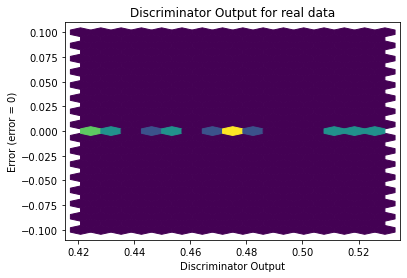

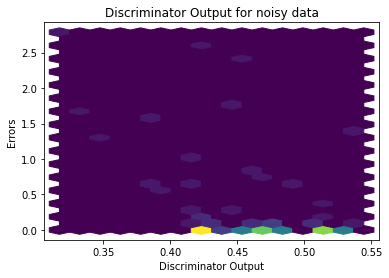

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


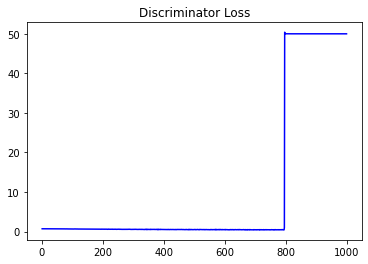

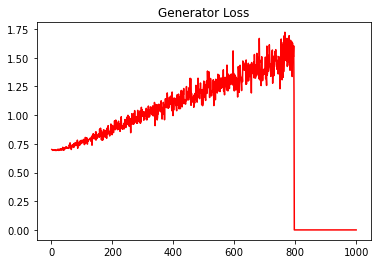

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
160.3713377456223


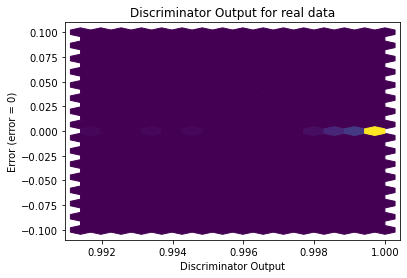

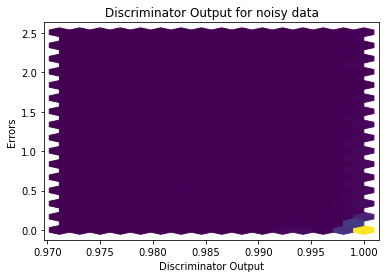

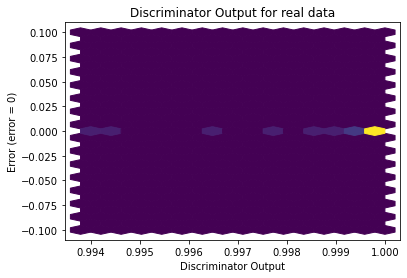

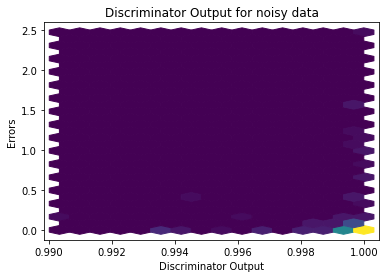

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0452]], requires_grad=True)
